<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Normalización" data-toc-modified-id="Normalización-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Normalización</a></span><ul class="toc-item"><li><span><a href="#Tipos-de-normalización" data-toc-modified-id="Tipos-de-normalización-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tipos de normalización</a></span><ul class="toc-item"><li><span><a href="#Transformaciones-logarítmicas-o-raices-cuadradas." data-toc-modified-id="Transformaciones-logarítmicas-o-raices-cuadradas.-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Transformaciones logarítmicas o raices cuadradas.</a></span></li><li><span><a href="#Sklearn-MinMaxScaller" data-toc-modified-id="Sklearn-MinMaxScaller-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Sklearn MinMaxScaller</a></span></li></ul></li></ul></li><li><span><a href="#Estandarización" data-toc-modified-id="Estandarización-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Estandarización</a></span><ul class="toc-item"><li><span><a href="#Tipos-de-estandarización" data-toc-modified-id="Tipos-de-estandarización-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Tipos de estandarización</a></span><ul class="toc-item"><li><span><a href="#Sklearn-StandardScaler" data-toc-modified-id="Sklearn-StandardScaler-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Sklearn StandardScaler</a></span></li><li><span><a href="#Sklearn-RobustScaler" data-toc-modified-id="Sklearn-RobustScaler-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Sklearn RobustScaler</a></span></li></ul></li></ul></li></ul></div>

In [1]:
# cargamos las librerías que nos hacen falta para trabajar. 

import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from scipy import stats

pd.options.display.max_columns = None # recordamos que este comando nos permitía ver todas las columnas de dataframe

In [4]:
df = pd.read_csv("data/solo_california.csv", index_col = 0)
df.head()

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
6,CA,F,1026.0,459.0,470.0,491.0,496.0,13803.0,11.250000
12,CA,M,1538.0,271.0,317.0,342.0,393.0,15627.0,5.500000
16,CA,F,596.0,164.0,168.0,181.0,190.0,5273.0,16.500000
19,CA,F,2362.0,613.0,632.0,655.0,678.0,21179.0,8.928571
20,CA,F,2089.0,275.0,296.0,322.0,356.0,10484.0,7.125000


# Normalización 

Cuando hacemos modelos de predicción de tipo regresión lineal se deben de cumplir una serie de asunciones, una de ellas era que nuestros datos se tienen que ajustar a una distribución normal, es decir, si lo vieramos gráficamente debería tener forma de campana de Gauss. Muchas veces nos encontraremos que no tienen esta forma y necesitaremos ajustarla.

En nuestro caso queremos evaluar de que depende el precio del alquiler de pisos. En nuestro dataframe tendremos múltiples columnas, una de ellas el precio de los pisos y otras columnas como el índice de criminalidad, la edad, la cercanía al río, etc. En este caso nuestra variable respuesta es el precio de las casas. Cuando hacemos este tipo de análisis, debemos asegurarnos que nuestra variable respuesta tenga una distribución normal. Por lo tanto, importante, usaremos esta aproximación para hacer que nuestra variable respuesta(la que queremos predecir) tenga una distribución de campana de Gauss.

En el caso del csv que usaremos en la lección de hoy la variable respuesta es "median_home_val". Pero... 🤔¿Cómo podíamos saber si la variable es normal o no? Para ello tendremos varias opciones, visualmente, o aplicando ciertos test,como por ejemplo el Shapiro test.

In [5]:
df.head(2)

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
6,CA,F,1026.0,459.0,470.0,491.0,496.0,13803.0,11.25
12,CA,M,1538.0,271.0,317.0,342.0,393.0,15627.0,5.50


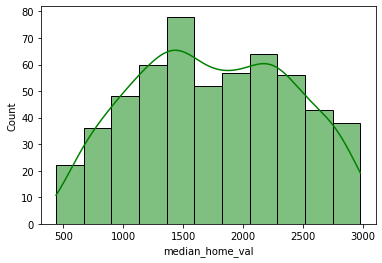

In [6]:
sns.histplot(df["median_home_val"], 
             kde = True, 
             color = "green");


In [7]:
stats.shapiro(df["median_home_val"])

ShapiroResult(statistic=0.9728603363037109, pvalue=1.31856552343379e-08)

Interpretemos:

- Si p-valor < 0.05 rechazamos la hipótesis nula, por lo tanto, los datos no son normales.

- Si p-valor > 0.05 no podemos rechazar la hipótesis nula, es decir, nuestros datos son normales.

**Conclusión**: Nuestros datos no son normales y, por lo tanto podremos intertar realizar una serie de transformaciones que nos permitan que se ajusten a una normal.



## Tipos de normalización

### Transformaciones logarítmicas o raices cuadradas. 

`LOGARÍTMICA`

La escala logarítmica implica la conversión de una columna a la escala lograrítimica. 

📌 Es importante tener en cuenta que esta transformación no la podremos hacer si tenemos algun valor en nuestra variable que sea 0.

En este caso aplicaremos este caso aplicaremos una*list comprehension* para evitar tener errores con los posibles valores 0 que tengamos en nuestra columna. 

In [8]:
df['median_home_val_LOG'] = df['median_home_val'].apply(lambda x: np.log(x) if x != 0 else 0)

In [9]:
df.head(2)

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa,median_home_val_LOG
6,CA,F,1026.0,459.0,470.0,491.0,496.0,13803.0,11.25,6.933423
12,CA,M,1538.0,271.0,317.0,342.0,393.0,15627.0,5.50,7.338238


In [10]:
stats.shapiro(df["median_home_val_LOG"])

ShapiroResult(statistic=0.9484020471572876, pvalue=5.57562459743699e-13)

`RAIZ CUADRADA`

La escala logarítmica implica la conversión de una columna a la escala lograrítimica. 

📌 Es importante tener en cuenta que esta transformación no la podremos hacer si tenemos algun valor en nuestra variable que sea 0.

In [11]:
df['median_home_val_SQRT'] = df['median_home_val'].apply(lambda x: math.sqrt(x))
df.head(2)

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa,median_home_val_LOG,median_home_val_SQRT
6,CA,F,1026.0,459.0,470.0,491.0,496.0,13803.0,11.25,6.933423,32.031235
12,CA,M,1538.0,271.0,317.0,342.0,393.0,15627.0,5.50,7.338238,39.217343


In [12]:
stats.shapiro(df["median_home_val_SQRT"])

ShapiroResult(statistic=0.9703302383422852, pvalue=3.7527034812967486e-09)

### Sklearn MinMaxScaller


El MinMaxScaler es una técnica de escalado utilizada en machine learning para normalizar los datos a un rango específico, generalmente entre 0 y 1. Su objetivo es transformar los datos de modo que el valor mínimo se ajuste a 0 y el valor máximo se ajuste a 1, manteniendo la proporción relativa entre los datos. Esto es útil para asegurarse de que todas las características tengan la misma escala y pueden ser comparadas de manera justa.

La sintaxis básica del MinMaxScaler en scikit-learn, una popular biblioteca de Python para machine learning, es la siguiente:

```python
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el escalador a los datos y transformarlos
X_scaled = scaler.fit_transform(X)
```

Donde:
- `MinMaxScaler` es la clase que implementa la normalización Min-Max.
- `scaler` es el objeto que instanciamos para aplicar la normalización.
- `X` es la variable respuesta que queremos normalizar.



In [14]:
# construir el modelo de escalador
minmax = MinMaxScaler()

# ajustamos el modelo utilizando nuestro set de datos
X_normalizadas = minmax.fit_transform(df[["median_home_val"]])

# lo unimos a nuestro dataframe original
df["median_home_val_NORM2"] = X_normalizadas

df.head(2)


,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa,median_home_val_LOG,median_home_val_SQRT,median_home_val_NORM2
6,CA,F,1026.0,459.0,470.0,491.0,496.0,13803.0,11.25,6.933423,32.031235,0.230830
12,CA,M,1538.0,271.0,317.0,342.0,393.0,15627.0,5.50,7.338238,39.217343,0.432167


In [15]:
stats.shapiro(df["median_home_val_NORM2"])

ShapiroResult(statistic=0.9728603363037109, pvalue=1.31856552343379e-08)

# Estandarización

La estandarización es un proceso utilizado en análisis de datos y machine learning para transformar los datos en una escala común o estándar. Su objetivo principal es llevar las variables a un rango específico o estandarizarlas de tal manera que puedan ser comparadas de manera justa y precisa.

**¿Por qué es importante la normalización?**

La normalización es importante por varias razones:

1. **Comparación justa:** Cuando trabajamos con datos que tienen diferentes unidades de medida o escalas, es difícil compararlos directamente. La normalización ayuda a que todas las variables estén en una misma escala, lo que facilita su comparación.

2. **Mejora del rendimiento de los algoritmos:** En machine learning, muchos algoritmos funcionan mejor cuando los datos están estandarizados. Algunos algoritmos son sensibles a la escala de las características, y la estandarización puede ayudar a que converjan más rápido y a que proporcionen resultados más precisos.

3. **Interpretación más sencilla:** Cuando las variables predictoras están estandarizadas, los coeficientes de los modelos son más fácilmente interpretables. Esto permite entender la importancia relativa de cada variable en el modelo.


Estandarizar generalmente significa cambiar los valores de nuestras columnas de manera que la desviación estándar de la distribución sea igual a uno y la media igual a 0. 

$$Z =  \frac{X - µ}{Ω}$$

Donde:

- `X`: es el valor que queremos normalizar.


- `µ`: es la media de todos los valores que queremos normalizar.


- `Ω`: es la desviación estandar de los valores que queremos normalizar.

##  Tipos de estandarización

### Sklearn StandardScaler

La estandarización que hemos visto antes, la podemos hacer también con un método de sklearn. El StandardScaler es una técnica de estandarización que transforma tus datos para que tengan una media (promedio) de 0 y una desviación estándar de 1. Esto significa que los datos estarán centrados en 0 y tendrán una dispersión uniforme, lo que facilita la comparación y el uso de algoritmos de *machine learning* que son sensibles a la escala de las características.

La sintaxis básica del StandardScaler en scikit-learn, una popular biblioteca de Python para machine learning, es la siguiente:

```python
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el escalador a los datos y transformarlos
X_scaled = scaler.fit_transform(X)
```

Donde:
- `StandardScaler` es la clase que implementa la estandarización.
- `scaler` es el objeto que instanciamos para aplicar la estandarización.
- `X` es tu conjunto de datos (las variables predictoras numéricas) que deseamos estandarizar.

Una vez que ajustas el escalador a tus datos con `fit_transform`, puedes usar `X_scaled` para trabajar con tus datos estandarizados. Esto es especialmente útil cuando estás preparando tus datos para entrenar modelos de machine learning, ya que muchos algoritmos funcionan mejor con datos estandarizados.

In [16]:
# creamos una lista con todas las variables numericas predictoras, eliminamos la variable respuesta porque esa esta normalizada
num_col = df.select_dtypes(include = np.number).drop("median_home_val", axis = 1).columns
num_col

Index(['median_household_income', 'num_habitaciones', 'num_vecinos',
       'total_habitaciones', 'total_baños', 'dist_playa',
       'median_home_val_LOG', 'median_home_val_SQRT', 'median_home_val_NORM2'],
      dtype='object')

In [17]:
# iniciamos la clase para escalar
scaler = StandardScaler()

# ajustamos nuestros datos
X_escaladas = scaler.fit_transform(df[num_col])

# hacemos una copia del dataframe para insertar las columnas estandarizadas
df_stan = df.copy()


# insertamos los valores estandarizados en el DataFrame
df_stan[num_col] = X_escaladas
df_stan.head()

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa,median_home_val_LOG,median_home_val_SQRT,median_home_val_NORM2
6,CA,F,1026.0,0.674804,0.450062,0.539461,0.293119,-0.395627,-0.130879,-1.106168,-1.139045,-1.136532
12,CA,M,1538.0,-0.806850,-0.720324,-0.642816,-0.494329,-0.081840,-0.792514,-0.131718,-0.240701,-0.340184
16,CA,F,596.0,-1.650131,-1.860112,-1.920311,-2.046290,-1.863065,0.473221,-2.413688,-2.091396,-1.805340
19,CA,F,2362.0,1.888499,1.689295,1.840760,1.684533,0.873285,-0.397999,0.901010,0.932289,0.941438
20,CA,F,2089.0,-0.775325,-0.880966,-0.801511,-0.777199,-0.966604,-0.605530,0.605357,0.570402,0.516823


### Sklearn RobustScaler

El RobustScaler es una técnica de escalado que se utiliza en machine learning para estandarizar las variables predictoras numéricas (a excepción de la variable respuesta), pero a diferencia del StandardScaler, el RobustScaler es más robusto frente a valores atípicos (outliers). Esto significa que el RobustScaler calcula la estandarización utilizando la mediana y el rango intercuartílico en lugar de la media y la desviación estándar, lo que lo hace adecuado para datos que contienen valores atípicos.

La sintaxis básica del RobustScaler es la siguiente:

```python
from sklearn.preprocessing import RobustScaler

# Crear un objeto RobustScaler
scaler = RobustScaler()

# Ajustar el escalador a los datos y transformarlos
X_scaled = scaler.fit_transform(X)
```

Donde:
- `RobustScaler` es la clase que implementa la estandarización robusta.
- `scaler` es el objeto que instanciamos para aplicar la estandarización.
- `X` es tu conjunto de datos que deseamos estandarizar.


In [18]:
# iniciamos la clase para escalar
scaler_robust = RobustScaler()

# ajustamos nuestros datos
X_escaladas_robust = scaler_robust.fit_transform(df[num_col])

# hacemos una copia del dataframe para insertar las columnas estandarizadas
df_robust = df.copy()


# insertamos los valores estandarizados en el DataFrame
df_robust[num_col] = X_escaladas_robust
df_robust.head()

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa,median_home_val_LOG,median_home_val_SQRT,median_home_val_NORM2
6,CA,F,1026.0,0.568862,0.357724,0.471976,0.285298,-0.266734,0.055920,-0.880559,-0.783727,-0.696368
12,CA,M,1538.0,-0.556886,-0.471545,-0.407080,-0.314410,-0.003891,-0.702001,-0.209362,-0.205615,-0.200484
16,CA,F,596.0,-1.197605,-1.279133,-1.356932,-1.496361,-1.495929,0.747936,-1.781173,-1.396594,-1.112833
19,CA,F,2362.0,1.491018,1.235772,1.439528,1.344978,0.796167,-0.250073,0.501976,0.549240,0.597579
20,CA,F,2089.0,-0.532934,-0.585366,-0.525074,-0.529840,-0.745010,-0.487806,0.298331,0.316355,0.333172


**Resumiendo**

- **StandardScaler:**
    - Utiliza la media y la desviación estándar para normalizar los datos.
    - Sensible a los valores atípicos, lo que significa que puede verse afectado negativamente por ellos.
    - Adecuado para datos que no contienen valores atípicos y siguen una distribución aproximadamente normal.
    - Puede ser más apropiado cuando estás seguro de que tus datos no contienen valores extremos o cuando deseas que los datos estén en una escala común con media 0 y desviación estándar 1.

- **RobustScaler:**
    - Utiliza la mediana y el rango intercuartílico (IQR) para normalizar los datos, lo que lo hace más robusto frente a valores atípicos.
    - Menos sensible a valores extremos y capaz de manejarlos mejor que el StandardScaler.
    - Adecuado para datos que contienen valores atípicos o no siguen una distribución normal.
    - Puede ser más apropiado cuando no estás seguro de la presencia de valores atípicos en tus datos o cuando deseas una normalización más resistente a valores extremos.

**¿Cuándo usar cada uno de los métodos?**

- Si estamos seguros de que nuestros datos no contienen valores atípicos y siguen una distribución aproximadamente normal, el StandardScaler es una opción sólida y fácil de usar.

- Si nuestros datos contienen valores atípicos o si no estamos seguros de la presencia de valores extremos, el RobustScaler es una elección más segura, ya que es menos sensible a los valores atípicos y puede proporcionar una normalización más confiable.


Por lo tanto, siempre es una buena práctica explorar tus datos y entender su naturaleza antes de decidir qué técnica de escalado utilizar, ya que la elección correcta puede afectar el rendimiento de tus modelos de machine learning.